# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>



## Esercizio 08.1/2 - Soluzione Proposta

Il simulated annealing, o "ricottura" simulata, e' una tecnica di ottimizzazione che consiste nel cercare di minimizzare una certa quantita' $L$ esplorando lo spazio delle soluzioni usando come distribuzione la legge di Boltzmann $\rho(x)=e^{-\beta L}$ variando la temperatura.

Variando la temperatura e' infatti possibile esplorare piu' o meno ampiamente lo spazio delle soluzioni: a temperature alte sara' possibile esplorare ampiamente lo spazio evitando di rimanere incastrati in un minimo locale, al contrario, con temperature basse si potra' studiare nel dettaglio una precisa zona dello spazio.

Il SA consiste, in analogia con lo studio dei solidi cristallini, in un lento processo di raffredamento, in modo da rendere consistente la ricerca della soluzione di minimo.

Sara' quindi necessario utilizzare due metodi Metropolis: uno per il calcolo dell'energia media come integrale, un altro per esplorare lo spazio delle soluzioni secondo la distribuzione di Boltzmann con il valore dell'energia precedentemente calcolato.

###  Calcolo dell'integrale


Nel caso in questione, la quantita' che si vuole minimizzare e':

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

e' lo spazio da esplorare sara' lo spazio delle funzioni d'onda, caratterizzate dalla coppia ($\mu,\sigma$).

Per il calcolo dell'integrale si e' adottato il metodo Metropolis, andando pertanto a campionare come distribuzione il modulo quadro della funzione d'onda, proponendo come mossa per l'esplorazione della variabile $x$, $x_{new}=x_{old}+\delta$ con $\delta$ contenuto uniformemente in $[-3.5,3.5]$, in modo da poter superare eventuali minimi della funzione d'onda.


L'integrale e' stato calcolato su 100 blocchi da 10000 steps ciascuno.


### Ricerca del minimo 

Fissata una temperatura $T$, si e' svolta una ricerca del minimo implementando un secondo Metropolis, proponendo come mossa $\mu=\mu + \delta_{SA}$ $\sigma=\sigma + \sigma_{SA}$ con $\delta_{SA}$ in $[-0.05,0,05]$, e accettando la mossa con propabilita' pari a min{$1,e^{-\beta(E_{new}-E_{old})}$}

Per ogni singola ricerca sono state usate 100 mosse.

### Simulated Annealing

Il processo e' stato ripetuto consecutivamente per ogni temperatura, durarnte il processo di raffreddamento, ottenuto partendo da una temperatura di 1 e abbassandola del 20% per 25 volte, passando cosi da un tasso di accettazione massimo del 90% a uno minimo del 40%.



Sono di seguito riportati i risultati ottenuti:

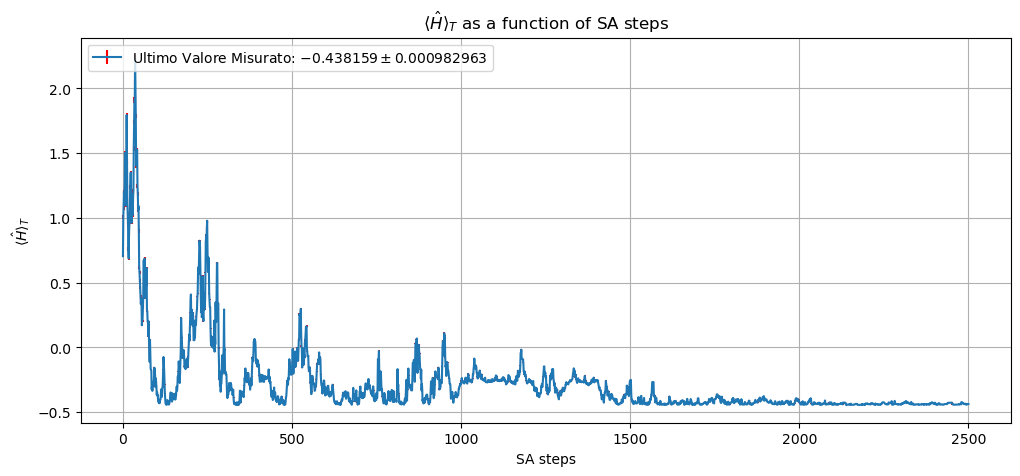

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati
ints = np.loadtxt("ints.data")

# Estrai l'ultimo integrale e il relativo errore
ultimo_integrale = ints[-1, 1]
errore_ultimo_integrale = ints[-1, 2]

# Formatta il valore dell'ultimo integrale e del relativo errore con tutte le cifre significative
ultimo_integrale_str = '{:.{}g}'.format(ultimo_integrale, len(str(ints[-1, 1]).split('.')[1]))
errore_ultimo_integrale_str = '{:.{}g}'.format(errore_ultimo_integrale, len(str(ints[-1, 2]).split('.')[1]))

# Crea il plot
plt.figure(figsize=(12, 5))

# Plot degli errori con barre di errore
plt.errorbar(ints[:, 0], ints[:, 1], yerr=ints[:, 2], ecolor='red', label='Integrale con errore')

plt.xlabel('SA steps')
plt.ylabel(r"$\langle {\hat H} \rangle_T$")
plt.grid()
plt.title(r"$\langle {\hat H} \rangle_T$ as a function of SA steps")

# Aggiunta del valore dell'ultimo integrale alla legenda del grafico
legenda = r'Ultimo Valore Misurato: ${} \pm {}$'.format(ultimo_integrale_str, errore_ultimo_integrale_str)
plt.legend([legenda], loc='upper left')

plt.show()


- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps


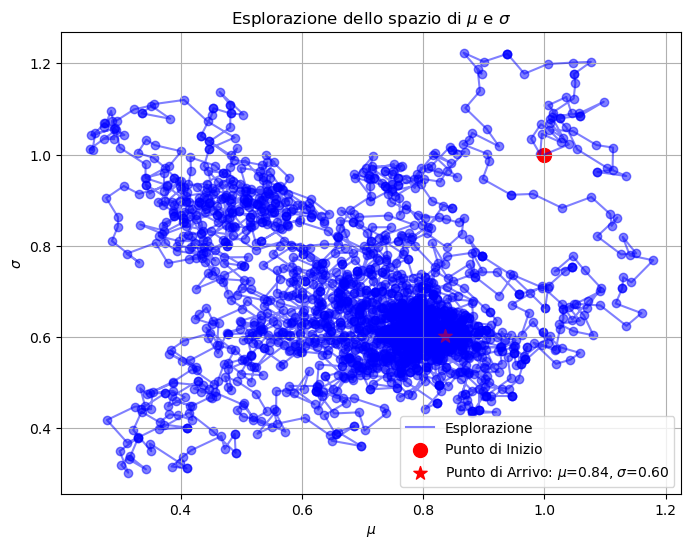

In [2]:
import numpy as np
import matplotlib.pyplot as plt

params=np.loadtxt("./parameters.data")
mu=params[:,2]
sigma=params[:,1]

# Definisci i punti di inizio e di arrivo
punto_inizio = (mu[0], sigma[0])
punto_arrivo = (mu[-1], sigma[-1])

# Crea il plot
plt.figure(figsize=(8, 6))

# Disegna le linee che collegano i punti
plt.plot(mu, sigma, c='blue', alpha=0.5, linestyle='-', marker='', label='Esplorazione')

# Disegna i punti tranne che per il punto iniziale e finale
plt.scatter(mu[1:-1], sigma[1:-1], c='blue', alpha=0.5, marker='o', label='_nolegend_')
plt.scatter(*punto_inizio, c='red', label='Punto di Inizio', s=100)
plt.scatter(*punto_arrivo, marker='*',c='red', label=f'Punto di Arrivo: $\mu$={punto_arrivo[0]:.2f}, $\sigma$={punto_arrivo[1]:.2f}', s=100)

plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title(r'Esplorazione dello spazio di $\mu$ e $\sigma$')
plt.legend()
plt.grid(True)
plt.show()

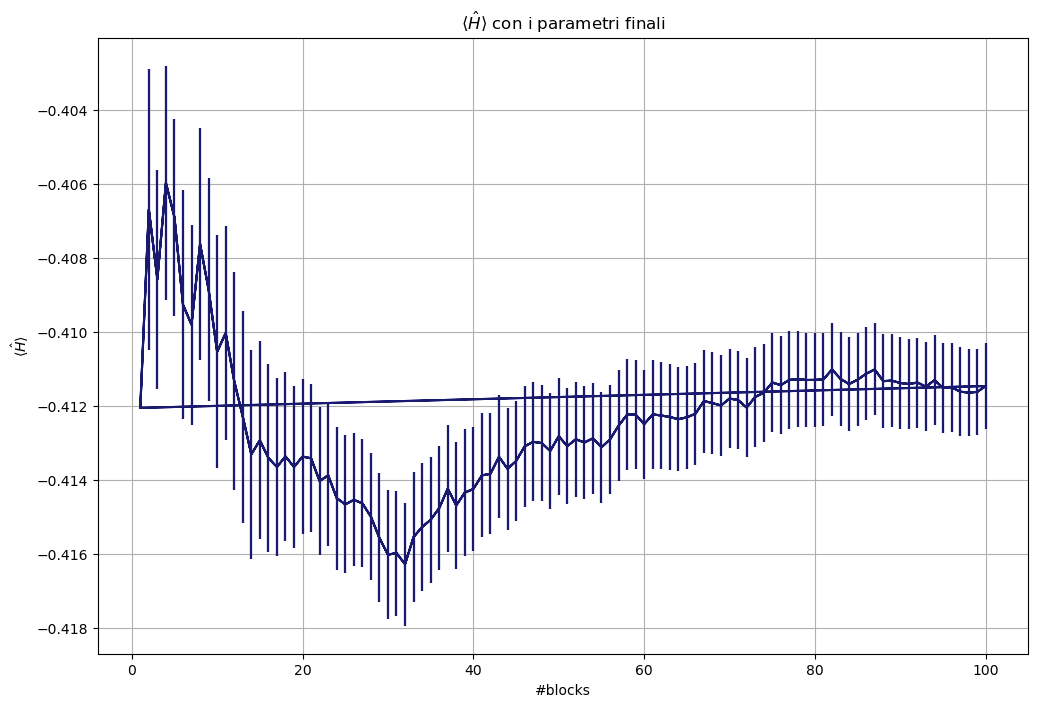

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data2=np.loadtxt("output_I.dat")

plt.figure(figsize=(12, 8))

plt.errorbar(data2[:, 0], data2[:, 2], yerr=data2[:, 3], color='midnightblue')

plt.xlabel("#blocks")
plt.ylabel(r"$\langle {\hat H} \rangle$")
plt.grid()
plt.title(r"$\langle {\hat H}\rangle$ con i parametri finali")


plt.show()

### <span style="color:green">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

Ground state energy:  -0.46046587969271563
1st excited state energy:  0.09742471331760998
2nd excited state energy:  1.971733134393021


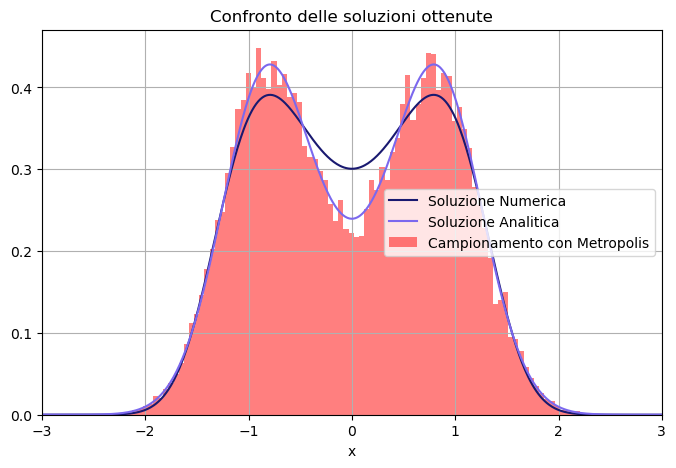

In [4]:
import numpy as np
import matplotlib.pyplot as plt

best_mu=mu[-1]
best_sigma=sigma[-1]


def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

def PsiSquare(x):
    return (np.exp(-(x-best_mu)**2/(2.0 * best_sigma**2)) + np.exp(-(x+best_mu)**2/(2.0 * best_sigma**2)))**2

    
hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot 
plt.figure(figsize=(8,5))
scale = 0.3

plt.plot(x,(psi[0])**2, label='Soluzione Numerica', color="midnightblue")
plt.plot(x, PsiSquare(x)/( a*np.mean(PsiSquare(x)) ), color = 'mediumslateblue', label="Soluzione Analitica")

# Carica i dati dall'istogramma
histo_data = np.loadtxt("isto.dat")

# Plot dell'istogramma
plt.hist(histo_data, bins=100, density=True, alpha=0.5, color='r', label='Campionamento con Metropolis')

plt.title("Confronto delle soluzioni ottenute")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.legend()
plt.show()
